### Student Activity: Beta Comparisons

This program reads in the daily closing prices of social media stocks—FB, TWTR, SNAP—and the S&P 500 as CSVs and calculates the rolling 30-day beta values of each social media to plot the trends in volatility relative to the market.

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read CSVs in as DataFrames

In [2]:
# Read the daily closing prices of FB, set the `date` as a datetime index
fb_data = Path("../Resources/fb_data.csv")
fb_df = pd.read_csv(fb_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of TWTR, set the `date` as a datetime index
twtr_data = Path("../Resources/twtr_data.csv")
twtr_df = pd.read_csv(twtr_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of SNAP, set the `date` as a datetime index
snap_data = Path("../Resources/snap_data.csv")
snap_df = pd.read_csv(snap_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of S&P 500, set the `date` as a datetime index
sp500_data = Path("../Resources/sp500_data.csv")
sp500_df = pd.read_csv(sp500_data, index_col="date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,close
date,
2014-05-20,1872.829956
2014-05-21,1888.030029
2014-05-22,1892.489990
2014-05-23,1900.530029
2014-05-27,1911.910034


### Combine DataFrames, Sort Index, and Rename Columns

In [3]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([fb_df, twtr_df, snap_df, sp500_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)0
combined_df.sort_index()

# Set column names to 'AMZN' and 'S&P 500'
combined_df.columns = ["FB", "TWTR", "SNAP", "S&P 500"]

# Display a few rows
combined_df.head()

,FB,TWTR,SNAP,S&P 500
date,,,,
2019-05-17,185.30,37.50,11.49,2859.530029
2019-05-16,186.99,38.30,11.42,2876.320068
2019-05-15,186.27,37.90,10.66,2850.959961
2019-05-14,180.73,36.93,10.49,2834.409912
2019-05-13,181.54,36.59,10.11,2811.870117


### Calculate Daily Returns

In [4]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = combined_df.pct_change()
daily_returns.head()

,FB,TWTR,SNAP,S&P 500
date,,,,
2019-05-17,NaN,NaN,NaN,NaN
2019-05-16,0.009120,0.021333,-0.006092,0.005872
2019-05-15,-0.003850,-0.010444,-0.066550,-0.008817
2019-05-14,-0.029742,-0.025594,-0.015947,-0.005805
2019-05-13,0.004482,-0.009207,-0.036225,-0.007952


### Calculate Covariance of Social Media Stock Returns vs. S&P 500 Returns

In [5]:
# Calculate covariance of all daily returns of social media stocks vs. S&P 500
fb_covariance = daily_returns['FB'].cov(daily_returns['S&P 500'])
twtr_covariance = daily_returns['TWTR'].cov(daily_returns['S&P 500'])
snap_covariance = daily_returns['SNAP'].cov(daily_returns['S&P 500'])

snap_covariance

8.143752411104528e-05

### Calculate Variance of S&P 500 Returns

In [6]:
# Calculate variance of all daily returns of social media stocks vs. S&P 500
variance = daily_returns['S&P 500'].var()
variance

7.065620867765688e-05

### Calculate Beta Values of Social Media Stocks

In [7]:
# Calculate beta of all daily returns of social media stocks
fb_beta = fb_covariance / variance
twtr_beta = twtr_covariance / variance
snap_beta = snap_covariance / variance

print(f"FB: {fb_beta} | TWTR: {twtr_beta} | SNAP: {snap_beta}")

FB: 1.281859508524622 | TWTR: 1.5193591987729476 | SNAP: 1.1525883660496732


### Calculate 30-Day Rolling Betas of AMZN Returns vs. S&P 500 Returns

In [8]:
# Calculate 30-day rolling covariance of AMZN vs. S&P 500 and plot the data
rolling_fb_covariance = daily_returns['FB'].rolling(window=30).cov(daily_returns['S&P 500'])
rolling_twtr_covariance = daily_returns['TWTR'].rolling(window=30).cov(daily_returns['S&P 500'])
rolling_snap_covariance = daily_returns['SNAP'].rolling(window=30).cov(daily_returns['S&P 500'])

# Calculate 30-day rolling covariance of AMZN vs. S&P 500 and plot the data
rolling_variance = daily_returns['S&P 500'].rolling(window=30).var()

# Calculate 30-day rolling beta of AMZN and plot the data
rolling_fb_beta = rolling_fb_covariance / rolling_variance
rolling_twtr_beta = rolling_twtr_covariance / rolling_variance
rolling_snap_beta = rolling_snap_covariance / rolling_variance
rolling_snap_beta

date
2019-05-17         NaN
2019-05-16         NaN
2019-05-15         NaN
2019-05-14         NaN
2019-05-13         NaN
2019-05-10         NaN
2019-05-09         NaN
2019-05-08         NaN
2019-05-07         NaN
2019-05-06         NaN
2019-05-03         NaN
2019-05-02         NaN
2019-05-01         NaN
2019-04-30         NaN
2019-04-29         NaN
2019-04-26         NaN
2019-04-25         NaN
2019-04-24         NaN
2019-04-23         NaN
2019-04-22         NaN
2019-04-18         NaN
2019-04-17         NaN
2019-04-16         NaN
2019-04-15         NaN
2019-04-12         NaN
2019-04-11         NaN
2019-04-10         NaN
2019-04-09         NaN
2019-04-08         NaN
2019-04-05         NaN
                ...   
2017-04-12    2.627079
2017-04-11    2.457175
2017-04-10    2.422561
2017-04-07    2.428525
2017-04-06    2.430237
2017-04-05    2.635637
2017-04-04    2.809419
2017-04-03    3.373461
2017-03-31    3.385377
2017-03-30    2.511813
2017-03-29    2.737084
2017-03-28    1.076293
2017-0

### Plot Rolling 30-Day Betas of Social Media Stocks

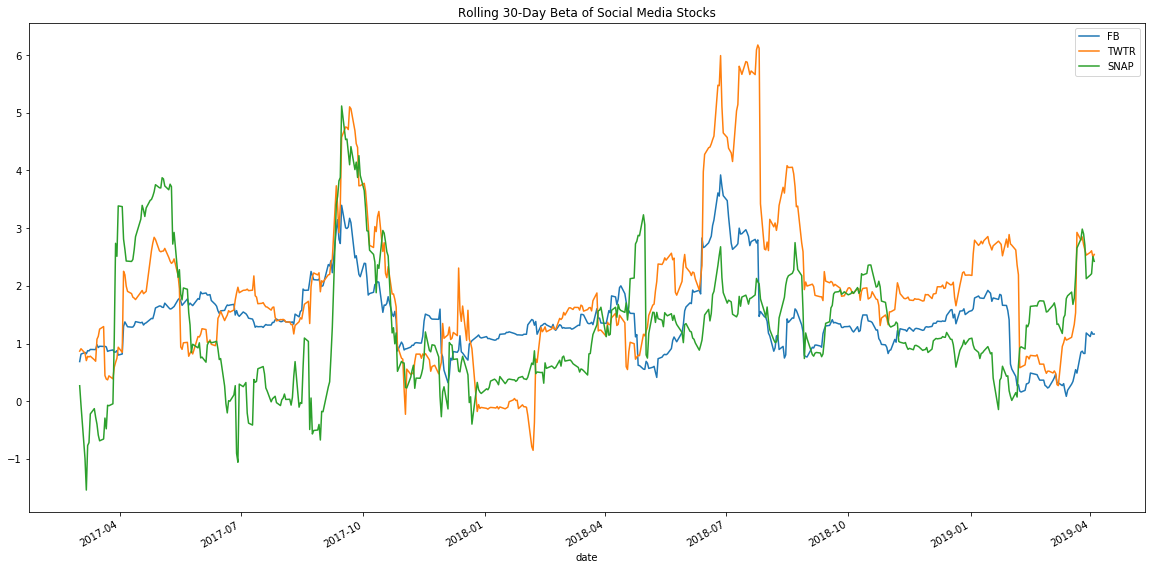

In [9]:
# Set the figure and plot the different datasets as multiple trends on the same figure
ax = rolling_fb_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Social Media Stocks')
rolling_twtr_beta.plot(ax=ax)
rolling_snap_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["FB", "TWTR", "SNAP"])